# ML: Linear Regression - Multi Variate
Linear Regression (Multi Variate) is a statistical method where you use a linear regression model to predict a dependent variable based on only multiple independent variables, meaning you are analyzing the relationship between all variables, making it a "multi variate" analysis

## Key points about *multi variate* linear regression:
- **Multiple predictor variable**: The key feature is that you use multiple independent variable (X) to predict the dependent variable (Y). 
- **Straight line fit**: The model aims to find the best straight line that fits the data points, representing the linear relationship between Xi and Y. 
- **Equation**: The basic equation for single variate linear regression is typically written as: 
 `y = m1x1 + m2x2 + b`, where
  - `m1` is the slope of the line1
  - `m2` is the slope of the line2
  - `b` is the intercept
- **Examples**
  - Predicting house price based on square footage & bed rooms
  - Predicting weight based on height & age of a person

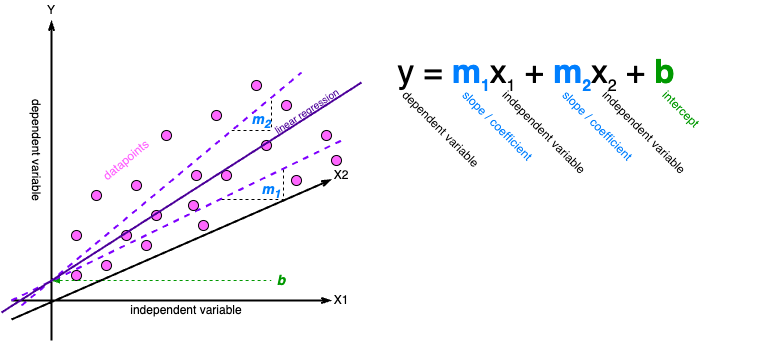

## Problem Statement

### 1.Predict House Price based on given House Area & Age

| House Area | House Age | House Price |
| :--------: | :-------: | :---------: |
|   sq.ft.   |     yr    |      $      |
|   2600.0   |     20    |  550000.00  |
|   3000.0   |     15    |  565000.00  |
|   3200.0   |     18    |  610000.00  |
|   3600.0   |     30    |  680000.00  |
|   4000.0   |     08    |  725000.00  |
|   4100.0   |     08    |  810000.00  |
Given above data build a machine learning model that can predict home prices based on given area in sq.ft & age in years.

In [ ]:
!pip install -r requirements.txt

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
data = {
    'area': [2600, 3000, 3200, 3600, 4000, 4100],
    'age': [20, 15, 18, 30, 8, 8],
    'price': [550000, 565000, 610000, 680000, 725000, 810000]
}
test = {
    'area': [2000, 3300, 4400],
    'age': [10, 13, 16]
}

In [6]:
df = pd.DataFrame(data)
df

,area,age,price
0,2600,20,550000
1,3000,15,565000
2,3200,18,610000
3,3600,30,680000
4,4000,8,725000
5,4100,8,810000


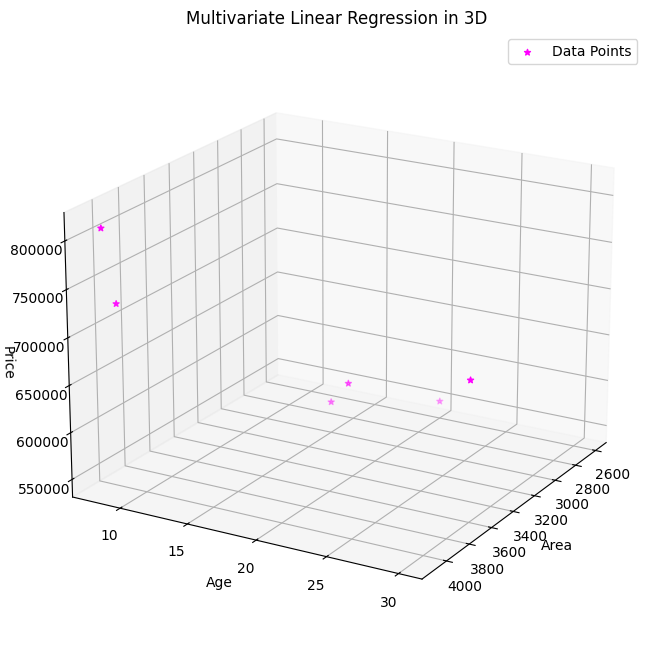

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.area, df.age, df.price, color='magenta',marker='*', label='Data Points')
ax.set_xlabel('Area')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('Multivariate Linear Regression in 3D')
ax.view_init(elev=20, azim=30)
ax.legend()

In [8]:
new_df = df.drop(['price'],axis='columns')
new_df

,area,age
0,2600,20
1,3000,15
2,3200,18
3,3600,30
4,4000,8
5,4100,8


In [12]:
reg = linear_model.LinearRegression()
reg.fit(new_df, df.price)

LinearRegression()

In [13]:
tst = pd.DataFrame(test)
tst

,area,age
0,2000,10
1,3300,13
2,4400,16


In [14]:
p=reg.predict(tst)
p

array([428639.22388436, 638857.20438692, 816583.06370283])

In [15]:
tst['prices']=p
tst

,area,age,prices
0,2000,10,428639.223884
1,3300,13,638857.204387
2,4400,16,816583.063703


In [16]:
m = reg.coef_
m

array([ 162.46060593, -326.9357369 ])

In [17]:
b = reg.intercept_
b

106987.36938678322

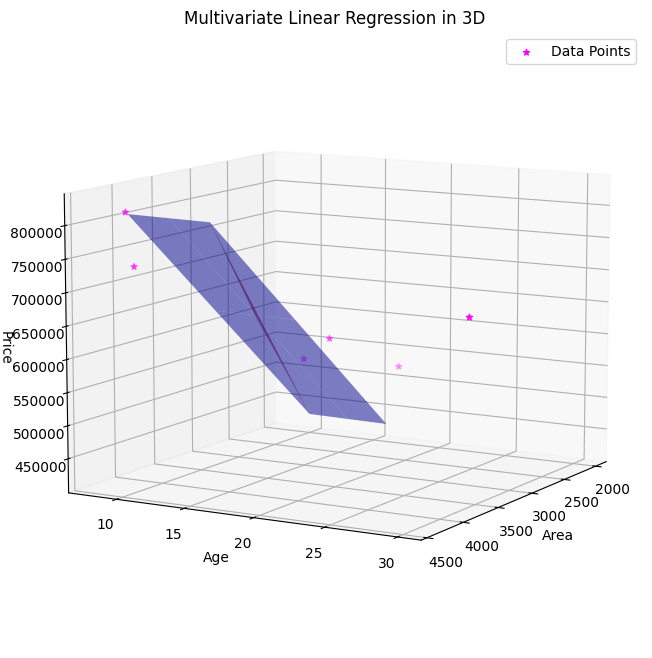

In [41]:
X1, X2 = np.meshgrid(tst.area, tst.age)
mesh_df = pd.DataFrame({'area': X1.ravel(), 'age': X2.ravel()})
Z = reg.predict(mesh_df).reshape(X1.shape)

%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.area, df.age, df.price, color='magenta',marker='*', label='Data Points')
ax.set_xlabel('Area')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('Multivariate Linear Regression in 3D')
ax.view_init(elev=10, azim=30)
ax.legend()
ax.plot_trisurf(tst.area, tst.age, tst.prices, color='red', alpha=0.5, label='Predicted')
ax.plot_surface(area, age, Z, color='blue', alpha=0.5, label='Predicted')